## Импорт библиотек

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml, load_digits

from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE
from umap import UMAP 

## Загрузка датасетов

In [64]:
coil20 = pd.read_csv('./dataset/coil20/coil20.csv')
coil20_labels = pd.read_csv('./dataset/coil20/coil20_labels.csv')

digits, digits_labels = load_digits(return_X_y=True, as_frame=False)
mnist, mnist_labels = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
fmnist, fmnist_labels = fetch_openml(data_id=40996, return_X_y=True, as_frame=False)

print(coil20_labels.size,'\n',digits.shape,'\n', mnist.shape,'\n',fmnist.shape)

datasets = [[coil20, coil20_labels.values], [mnist, mnist_labels], [fmnist, fmnist_labels], [digits, digits_labels],]


1439 
 (1797, 64) 
 (70000, 784) 
 (70000, 784)


## Тестирование гиперпараметров UMAP

##### Рассмотрим влияние таких параметров, как минимальное растояния между соседями (d_min) и количество соседей (n_neighbors)

#### На примере датасета PenDigits:
слево-направо значения n_neighbors c 5, 20, 80 и 320;

сверху-вниз значения d_min c 0.0125, 0.05, 0.2 и 0.8.

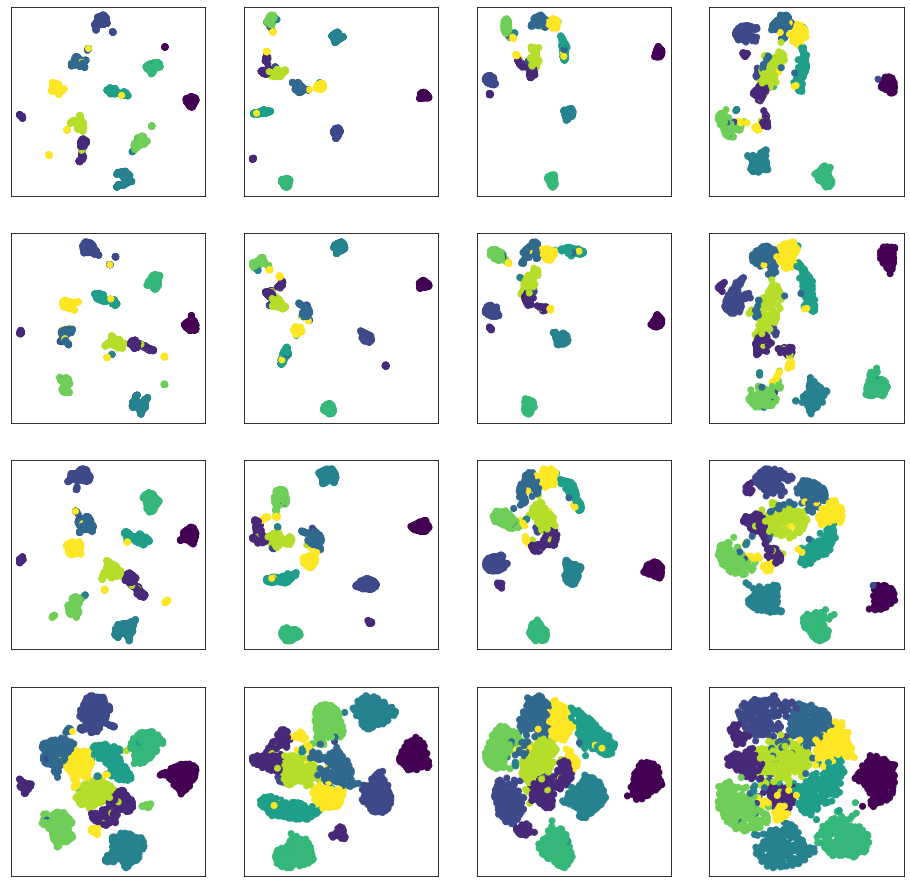

In [24]:
d_min = [0.0125, 0.05, 0.2, 0.8]
n_neighbors = [5, 20, 80, 320]

fig, axs = plt.subplots(4, 4, figsize=(16, 16))
for i, dist in enumerate(d_min):
    for j, neighbors in enumerate(n_neighbors): 

        umap = UMAP(n_components=2, n_neighbors=neighbors, min_dist=dist).fit_transform(digits)
        axs[i,j].scatter(umap[:, 0], umap[:,1], c=digits_labels.astype(int))
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])

#### Теперь протестируем гиперпараметры на датасете MNIST
слево-направо значения n_neighbors c 5, 20, 80 и 320;

сверху-вниз значения d_min c 0.0125, 0.05, 0.2 и 0.8.

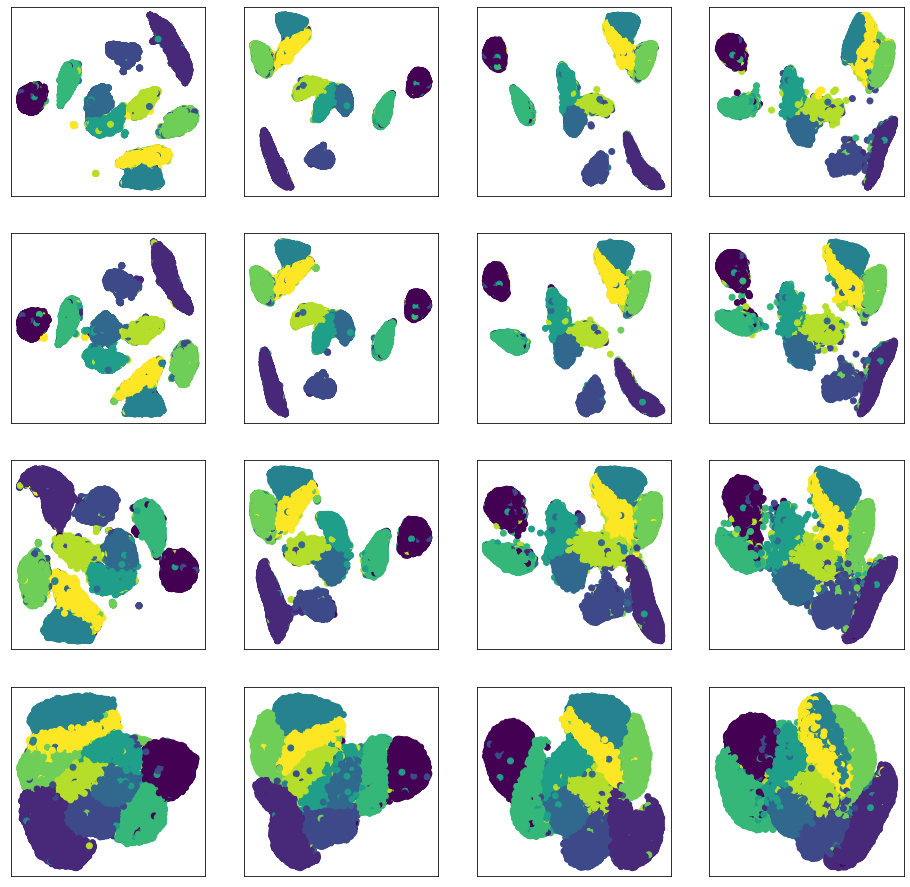

In [25]:
d_min = [0.0125, 0.05, 0.2, 0.8]
n_neighbors = [5, 20, 80, 320]

fig, axs = plt.subplots(4, 4, figsize=(16, 16))
for i, dist in enumerate(d_min):
    for j, neighbors in enumerate(n_neighbors): 
        umap = UMAP(n_components=2, n_neighbors=neighbors, min_dist=dist).fit_transform(mnist)
        axs[i,j].scatter(umap[:, 0], umap[:,1], c=mnist_labels.astype(int))
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])

## Сравнение алгоритмов уменьшения размерности

#### Протестируем работу алгоритмов UMAP, t-SNE, PCA, SVD на загруженных ранее датасетах
Графики для алгоритмов будут изображены в соответсвующем порядке:
Coil20, MNIST, Fashion-MNIST, PenDigits

#### UMAP

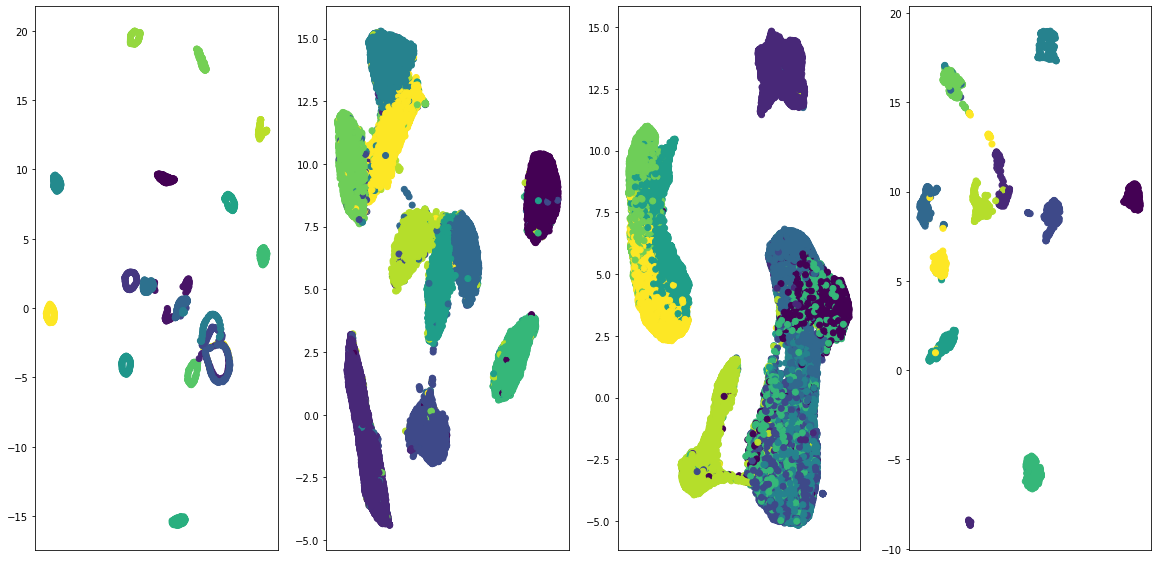

In [69]:
fig, axs = plt.subplots(1, 4, figsize=(20,10))

for i, (data, label) in enumerate(datasets):
    umap = UMAP(n_components=2).fit_transform(data)
    axs[i].scatter(umap[:, 0], umap[:,1], c=label.astype(int))
    axs[i].set_xticks([])

### t-SNE

c:\Users\egork\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\egork\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\Users\egork\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\egork\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\Users\egork\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization

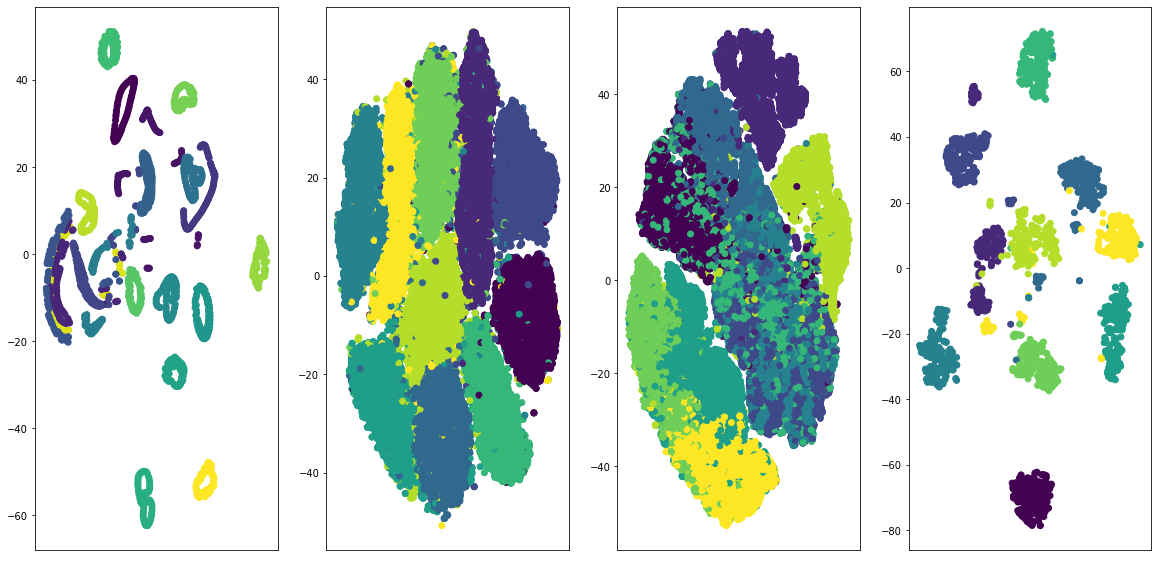

In [70]:
fig, axs = plt.subplots(1, 4, figsize=(20,10))

for i, (data, label) in enumerate(datasets):
    tSNE = TSNE(n_components=2).fit_transform(data)
    axs[i].scatter(tSNE[:, 0], tSNE[:,1], c=label.astype(int))
    axs[i].set_xticks([])

### PCA

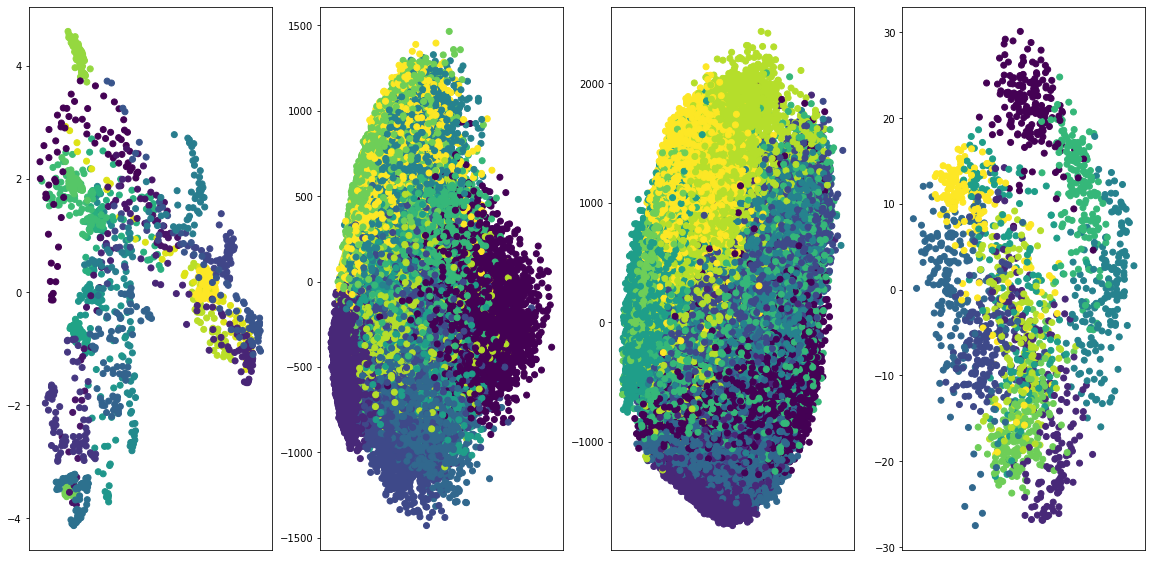

In [71]:
fig, axs = plt.subplots(1, 4, figsize=(20,10))

for i, (data, label) in enumerate(datasets):
    pca = PCA(n_components=2).fit_transform(data)
    axs[i].scatter(pca[:, 0], pca[:,1], c=label.astype(int))
    axs[i].set_xticks([])

### SVD

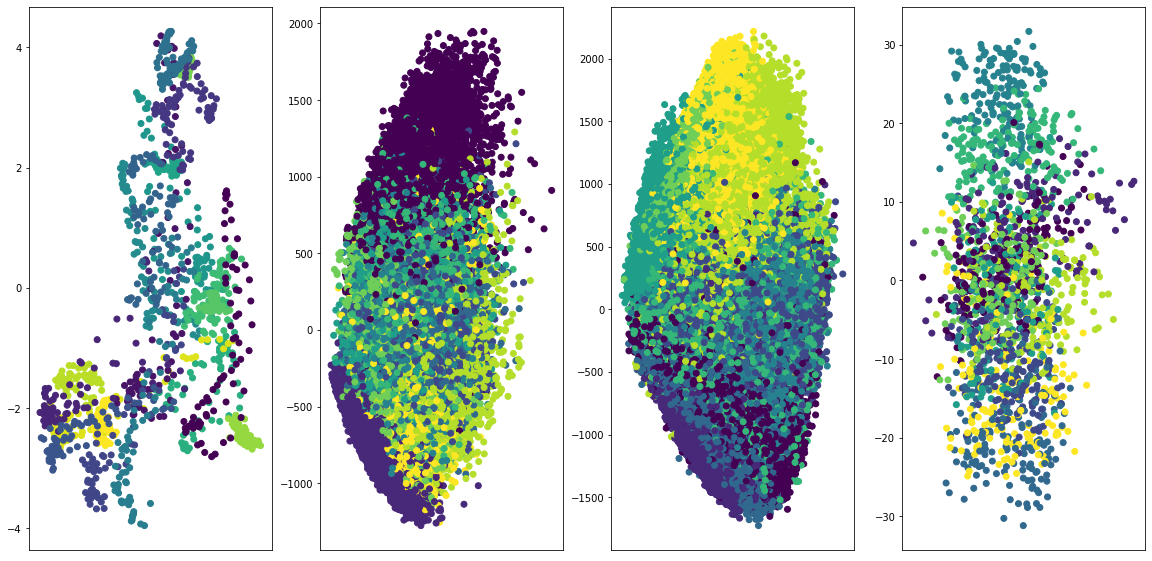

In [72]:
fig, axs = plt.subplots(1, 4, figsize=(20,10))

for i, (data, label) in enumerate(datasets):
    SVD = TruncatedSVD(n_components=2).fit_transform(data)
    axs[i].scatter(SVD[:, 0], SVD[:,1], c=label.astype(int))
    axs[i].set_xticks([])